In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np  
import pandas as pd  

In [67]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
iris.shape

(150, 6)

In [69]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [70]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [72]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [73]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [74]:
iris.Species.value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

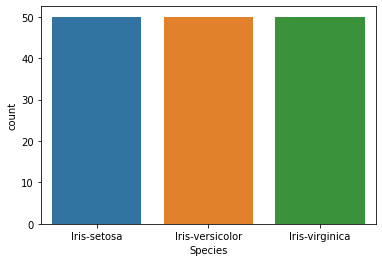

In [75]:
sns.countplot(x='Species',data=iris)

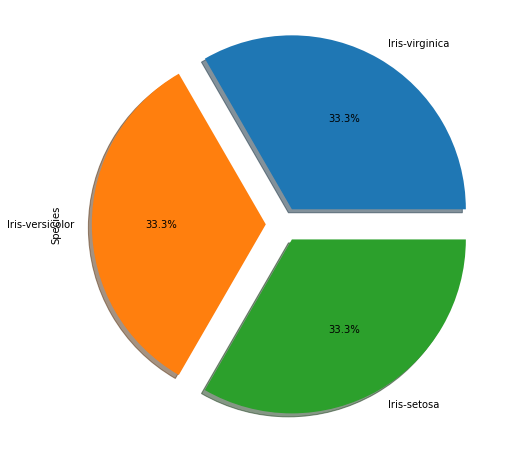

In [76]:
iris['Species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True, figsize=(10,8))
plt.show()

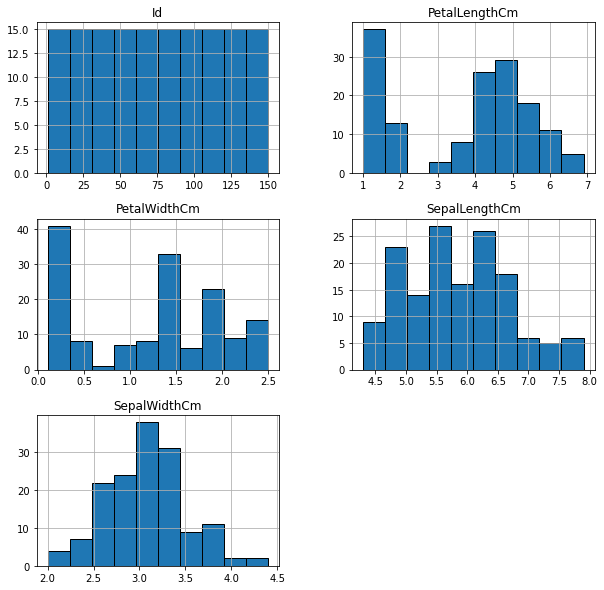

In [77]:
iris.hist(edgecolor='black',figsize=(10,10))
plt.show()

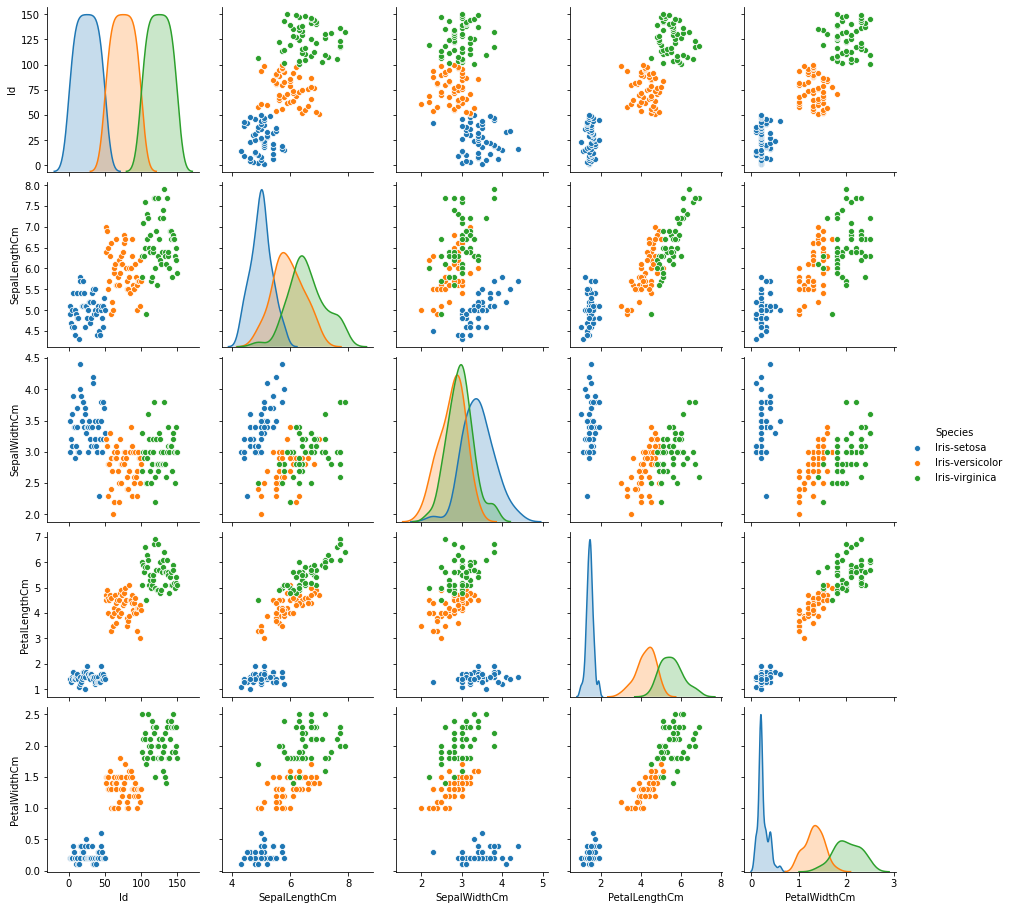

In [78]:
sns.pairplot(iris , hue='Species');

In [79]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


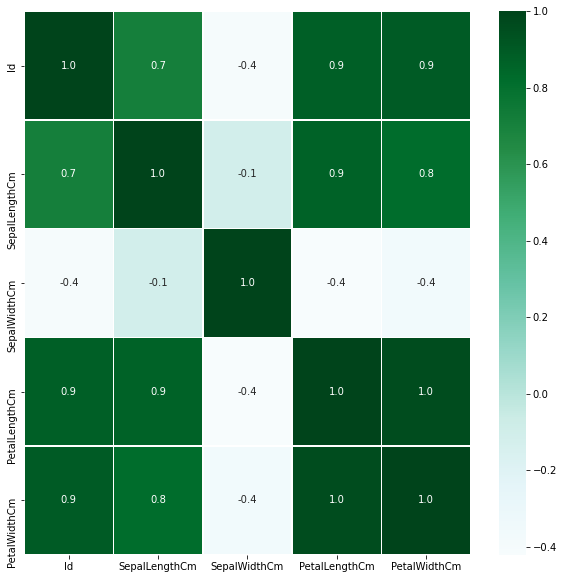

In [80]:
# Checking the correlation

plt.figure(figsize = (10,10))
sns.heatmap(iris.corr(),annot=True,linewidth=0.5,fmt= '.1f', cmap="BuGn")

In [81]:
# Drop the column having zero variance and having strong correlation

df=iris.drop(columns = ['Id'],axis=1)
df.shape

(150, 5)

In [82]:
# Getting data types for number or int.

ds = df.select_dtypes(include=[np.number])
ds.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [83]:
cols = ds.columns.to_list()
cols

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

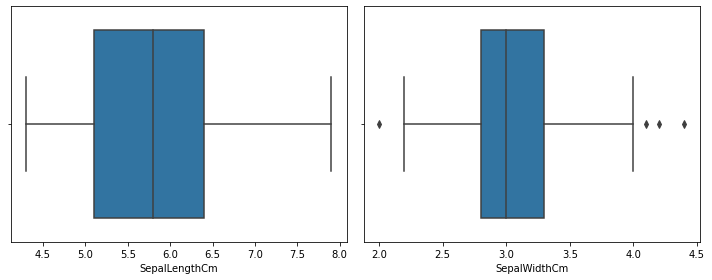

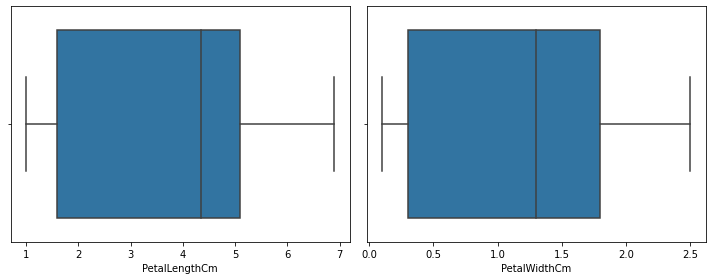

In [84]:
# Checking the outliers

import seaborn as sns
for i in range(0, len(cols), 2):
    if len(cols)>i + 1:
        plt.figure(figsize = (10,4))
        plt.subplot(121)
        sns.boxplot(ds[cols[i]])
        plt.subplot(122)
        sns.boxplot(ds[cols[i + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[i]])

In [85]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 4].values 

In [86]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 

In [87]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [142]:
from sklearn.neighbors import KNeighborsClassifier 

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [143]:
y_pred = classifier.predict(X_test)  

In [144]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[15  0  0]
 [ 0 10  1]
 [ 0  0  4]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.80      1.00      0.89         4

       accuracy                           0.97        30
      macro avg       0.93      0.97      0.95        30
   weighted avg       0.97      0.97      0.97        30



In [145]:
from sklearn.svm import SVC
svm_model= SVC()

In [146]:
#tuning the parameters to get the best parameter for SVM

tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['rbf'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.10], 'kernel': ['rbf'],
 'degree': [2,3,4]}

In [147]:
#Applying the hypertuned parameters on SVM to get better result

from sklearn.model_selection import GridSearchCV

model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [148]:
#Fetching the accuracy score on the basis of the model

model_svm.fit(X_train, y_train)
print(model_svm.best_score_)

0.975


In [149]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}


In [150]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=0.9, degree = 2)
svm.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 0.97 out of 1
The accuracy of the svm classifier on test data is 0.97 out of 1
